In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

In [3]:
wine.data.shape

(178, 13)

#### 차원축소 : 13차원 -> 2차원, 4차원, 6차원 으로 축소

In [4]:
# 2차원
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)

wine_pca2=pca2.fit_transform(wine_std)
wine_pca2[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [8]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 ]), 0.5540633835693534)

In [6]:
# 4차원
pca4 = PCA(n_components=4)

wine_pca4=pca4.fit_transform(wine_std)
wine_pca4[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579]])

In [9]:
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

In [10]:
# 6차원
pca6 = PCA(n_components=6)

wine_pca6=pca6.fit_transform(wine_std)
wine_pca6[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331, -0.31184159,
         0.114431  ],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579,  0.2984575 ,
        -0.4065196 ]])

In [11]:
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]), 0.8509811607477046)

#### PCA 전후비교

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

- 원본 데이터로 분류

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2022
)

In [14]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

- PCA 데이터로 분류

In [15]:
# 2차원
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, random_state=2022
)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [16]:
# 4차원
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target, random_state=2022
)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [17]:
# 6차원
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target, random_state=2022
)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

#### 시각화

In [18]:
df = pd.DataFrame(wine_pca2, columns=['PC1', 'PC2'])
df['target']=wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


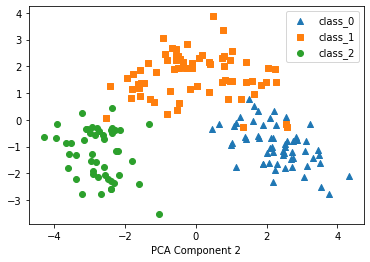

In [19]:
# PC1, PC2 시각화 : 품종 별로 마커의 색깔과 모양을 달리해서 표현하기
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_data = df[df.target == i]['PC1']
  y_data = df[df.target == i]['PC2']
  plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1'), plt.xlabel('PCA Component 2')
plt.show()

#### 4. Code Refactoring

In [21]:
def pca_accuracy(X,y):
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, stratify=y, random_state=2022
  )
  rfc = RandomForestClassifier(random_state=2022)
  rfc.fit(X_train, y_train)
  score = rfc.score(X_test, y_test)
  return score

In [22]:
for n in [2,4,6]:
  pca = PCA(n_components=n)
  wine_pca = pca.fit_transform(wine_std)
  explained = pca.explained_variance_ratio_.sum()
  acc = pca_accuracy(wine_pca, wine.target)
  print(f'PCA({n}): 설명력-{explained:.4f}, 정확도-{acc:.4f}')

PCA(2): 설명력-0.5541, 정확도-1.0000
PCA(4): 설명력-0.7360, 정확도-1.0000
PCA(6): 설명력-0.8510, 정확도-1.0000
